# 집돌이 vs 밖돌이

In [25]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
# 한글 폰트
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

In [27]:
path = 'C:\\Windows\\Fonts\\Hancom Gothic Regular.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

Hancom Gothic


In [28]:
# 그래프 스타일
plt.style.use('ggplot')

In [29]:
# load data
with open(r'C:\Users\soug9\Desktop\Shcard Summer School\data\survey17-27+zipdol.txt',"rb") as fp :
        survey = pickle.load(fp)  

In [30]:
len(survey)

445

In [31]:
survey.head()

,CLNN,SEX_CCD,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25_1,Q25_2,Q25_3,Q25_4,Q25_5,Q26,Q27,Q17,zipdol
0,Z0824235141ST,M,3,6,5,3,1,4,2,1.0,NaN,NaN,NaN,NaN,2,1,1,0
1,Z7134211171ST,M,1,5,5,5,5,3,1,NaN,NaN,3.0,NaN,NaN,5,5,1,0
2,Z9423260421ST,M,1,6,1,1,1,1,2,1.0,NaN,NaN,NaN,NaN,5,2,3,0
3,Z6814255701ST,M,1,1,2,2,1,1,1,NaN,NaN,NaN,4.0,NaN,1,1,4,1
4,Z2924230251ST,F,3,3,1,1,1,1,2,1.0,NaN,NaN,NaN,NaN,1,1,10,2


* 응답에 일관성이 없는 응답자 삭제

In [32]:
video2 = survey[(survey['Q20'] != 1) & (survey['Q21'] != 1) & (survey['Q22'] != 1) & (survey['Q23'] != '1')]
video1 = survey[(survey['Q20'] == 1) & (survey['Q21'] == 1) & (survey['Q22'] == 1) & (survey['Q23'] == '1')]

video = pd.concat([video1, video2])

In [33]:
len(video)

318

In [34]:
video.head()

,CLNN,SEX_CCD,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25_1,Q25_2,Q25_3,Q25_4,Q25_5,Q26,Q27,Q17,zipdol
2,Z9423260421ST,M,1,6,1,1,1,1,2,1.0,NaN,NaN,NaN,NaN,5,2,3,0
4,Z2924230251ST,F,3,3,1,1,1,1,2,1.0,NaN,NaN,NaN,NaN,1,1,10,2
8,Z5624247791ST,M,2,3,1,1,1,1,2,1.0,NaN,NaN,NaN,NaN,1,1,5,1
11,Z7714290061ST,M,1,3,1,1,1,1,2,1.0,NaN,NaN,NaN,NaN,1,1,2,0
14,Z9704236101ST,F,3,3,1,1,1,1,1,NaN,2.0,NaN,NaN,NaN,1,1,6,1


* 집돌이

In [35]:
zipdol = video[video['zipdol'] == 2]

In [36]:
len(zipdol)

95

In [37]:
zipdol.head()

,CLNN,SEX_CCD,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25_1,Q25_2,Q25_3,Q25_4,Q25_5,Q26,Q27,Q17,zipdol
4,Z2924230251ST,F,3,3,1,1,1,1,2,1.0,NaN,NaN,NaN,NaN,1,1,10,2
21,Z1634265931ST,F,3,1,1,1,1,1,2,1.0,NaN,NaN,NaN,NaN,1,1,9,2
25,Z0544232431ST,F,4,2,1,1,1,1,2,1.0,NaN,NaN,NaN,NaN,1,1,8,2
34,Z8724220501ST,F,1,1,1,1,1,1,2,1.0,NaN,NaN,NaN,NaN,1,1,9,2
49,Z8724252841ST,F,3,3,1,1,1,1,1,NaN,2.0,NaN,NaN,NaN,1,1,8,2


* 밖돌이

In [38]:
nozipdol = video[video['zipdol'] == 0]

In [39]:
len(nozipdol)

71

In [40]:
nozipdol.head()

,CLNN,SEX_CCD,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25_1,Q25_2,Q25_3,Q25_4,Q25_5,Q26,Q27,Q17,zipdol
2,Z9423260421ST,M,1,6,1,1,1,1,2,1.0,NaN,NaN,NaN,NaN,5,2,3,0
11,Z7714290061ST,M,1,3,1,1,1,1,2,1.0,NaN,NaN,NaN,NaN,1,1,2,0
53,Z3644273551ST,F,1,1,1,1,1,1,1,NaN,2.0,NaN,NaN,NaN,1,1,2,0
62,Z8833267411ST,F,1,3,1,1,1,1,1,NaN,2.0,NaN,NaN,NaN,1,1,2,0
73,Z3644235191ST,M,3,2,1,1,1,1,1,NaN,2.0,NaN,NaN,NaN,5,6(재밌어서),3,0


## 집돌이들은 동영상 스트리밍 서비스를 밖돌이보다 더 자주 이용할까? 

### (설문 Q20) 인터넷 동영상 스트리밍 서비스(넷플릭스, 유튜브 레드, 왓챠 플레이 등)에 대한 연간 이용 횟수는 얼마입니까?

* 집돌이

In [41]:
num, count_zip = np.unique(zipdol['Q20'], return_counts=True)

In [42]:
num, count_zip

(array([1, 2, 3, 4, 5], dtype=int64), array([40, 16,  4,  3, 32], dtype=int64))

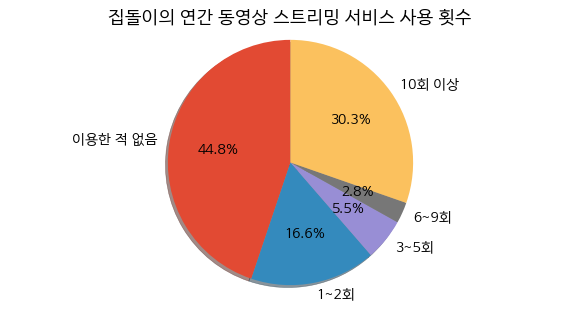

In [19]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['이용한 적 없음', '1~2회', '3~5회', '6~9회', '10회 이상']
sizes = count_zip

#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('집돌이의 연간 동영상 스트리밍 서비스 사용 횟수', fontsize=18)

plt.show()

* 밖돌이

In [43]:
num_nozip, count_nozip = np.unique(nozipdol['Q20'], return_counts=True)

In [44]:
num_nozip, count_nozip

(array([1, 2, 3, 4, 5], dtype=int64), array([35, 11,  6,  2, 17], dtype=int64))

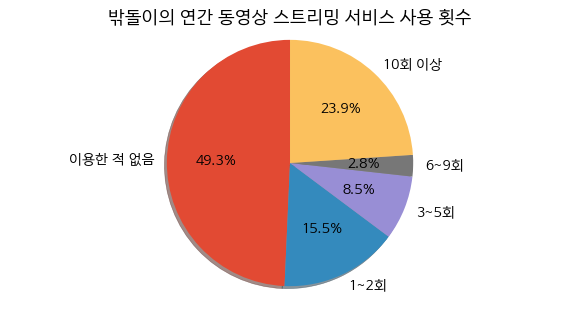

In [22]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['이용한 적 없음', '1~2회', '3~5회', '6~9회', '10회 이상']
sizes = count_nozip

#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('밖돌이의 연간 동영상 스트리밍 서비스 사용 횟수', fontsize=18)

plt.show()

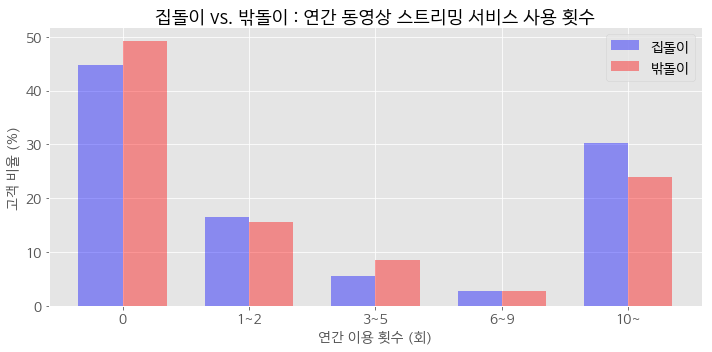

In [24]:
n_groups = 5

fig, ax = plt.subplots(figsize=(10,5))

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, count_zip/sum(count_zip)*100, bar_width,
                alpha=opacity, color='b',
                error_kw=error_config,
                label='집돌이')

rects2 = ax.bar(index + bar_width, count_nozip/sum(count_nozip)*100, bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='밖돌이')

ax.set_xlabel('연간 이용 횟수 (회)', fontsize=14)
ax.set_ylabel('고객 비율 (%)', fontsize=14)
ax.set_title('집돌이 vs. 밖돌이 : 연간 동영상 스트리밍 서비스 사용 횟수', fontsize=18)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['0', '1~2', '3~5', '6~9', '10~'], fontsize=14)
ax.set_yticks(range(0,60,10))
ax.set_yticklabels(range(0,60,10), fontsize=14)
ax.legend(fontsize=14)

 
fig.tight_layout()
plt.show()

In [22]:
count_zip[0]

40

In [45]:
data = list()
for i in range(len(count_zip)) :
    data.append(np.array([count_zip[i],count_nozip[i]]))

In [46]:
data

[array([40, 35], dtype=int64),
 array([16, 11], dtype=int64),
 array([4, 6], dtype=int64),
 array([3, 2], dtype=int64),
 array([32, 17], dtype=int64)]

In [56]:
data[0]

array([40, 35], dtype=int64)

In [48]:
range(1,1)

range(1, 1)

In [71]:
data[0][0]

40

1
2
2 [56 46]
3
3 [56 46]
3 [60 52]
4
4 [56 46]
4 [60 52]
4 [63 54]


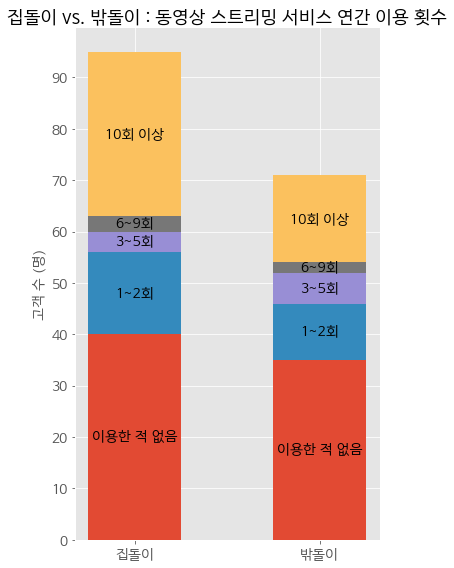

In [95]:
n_groups = 2

fig, ax = plt.subplots(figsize=(6,8))

index = np.arange(n_groups)

bar_width = 0.1

count = ['이용한 적 없음', '1~2회', '3~5회', '6~9회', '10회 이상']

plt.bar([0, 0.2], data[0], width=bar_width)

ax.text(0,data[0][0]/2, count[0] ,horizontalalignment='center',verticalalignment='center', fontsize=14)
ax.text(0.2,data[0][1]/2,count[0],horizontalalignment='center',verticalalignment='center', fontsize=14)

for i in range(1,len(data)) :
    print(i)
    
    bottom = data[0]
    for j in range(1, i) :
        bottom = bottom + data[j]
        print(i, bottom)
        
    plt.bar([0, 0.2], data[i], width=bar_width, bottom=bottom)
    
    ax.text(0, bottom[0] + data[i][0]/2, count[i] ,horizontalalignment='center',verticalalignment='center', fontsize=14)
    ax.text(0.2, bottom[1] + data[i][1]/2, count[i] ,horizontalalignment='center',verticalalignment='center', fontsize=14)
 

ax.set_ylabel('고객 수 (명)', fontsize=14)
ax.set_title('집돌이 vs. 밖돌이 : 동영상 스트리밍 서비스 연간 이용 횟수', fontsize=18)
ax.set_xticks([0, 0.2])
ax.set_xticklabels(['집돌이', '밖돌이'], fontsize=14)
ax.set_yticks(range(0,100,10))
ax.set_yticklabels(range(0,100,10), fontsize=14)
#ax.legend(fontsize=14)
 
fig.tight_layout()
plt.show()

In [92]:
data[0][0]+data[1][0]/2

48.0

## 집돌이들은 밖돌이보다 동영상 스트리밍 서비스 이용시간이 길까? 

### (설문 Q21) 인터넷 동영상 스트리밍 서비스(넷플릭스, 유튜브 레드, 왓챠 플레이 등)에 대한 1일 평균 이용 시간은 얼마입니까?

* 집돌이

In [25]:
num, count_zip21 = np.unique(zipdol['Q21'], return_counts=True)

In [26]:
num, count_zip21

(array([1, 2, 3, 4, 5], dtype=int64), array([65, 15, 37,  9, 19], dtype=int64))

* 밖돌이

In [27]:
num, count_nozip21 = np.unique(nozipdol['Q21'], return_counts=True)

In [28]:
num, count_nozip21

(array([1, 2, 3, 4, 5], dtype=int64), array([35, 17,  8,  4,  7], dtype=int64))

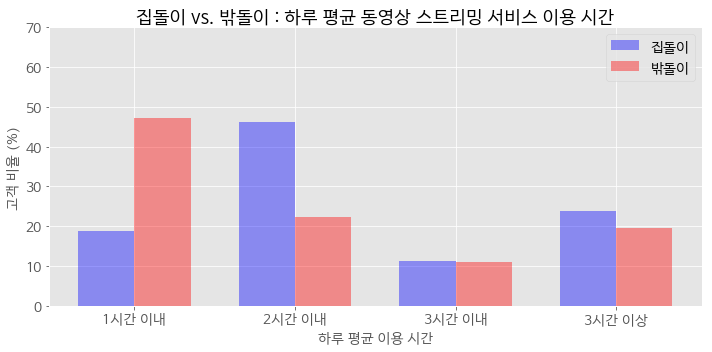

In [29]:
n_groups = 4

fig, ax = plt.subplots(figsize=(10,5))

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, count_zip21[1:]/sum(count_zip21[1:])*100, bar_width, 
                alpha=opacity, color='b', 
                error_kw=error_config, 
                label='집돌이')

rects2 = ax.bar(index + bar_width, count_nozip21[1:]/sum(count_nozip21[1:])*100, bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='밖돌이')

ax.set_xlabel('하루 평균 이용 시간', fontsize=14)
ax.set_ylabel('고객 비율 (%)', fontsize=14)
ax.set_title('집돌이 vs. 밖돌이 : 하루 평균 동영상 스트리밍 서비스 이용 시간', fontsize=18)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['1시간 이내', '2시간 이내', '3시간 이내', '3시간 이상'], fontsize=14)
ax.set_yticks(range(0,80,10))
ax.set_yticklabels(range(0,80,10), fontsize=14)
ax.legend(fontsize=14)

 
fig.tight_layout()
plt.show()

## 집돌이들은 언제 인터넷 동영상 스트리밍 서비스를 이용할까? 

### (설문 Q22) 유료 콘텐츠를 이용하는 경우 어느 시간대에 주로 이용하십니까?

* 집돌이

In [32]:
num, count_zip22 = np.unique(zipdol['Q22'], return_counts=True)

In [33]:
num, count_zip22

(array([1, 2, 3, 4, 5], dtype=int64), array([40,  2,  4, 36, 13], dtype=int64))

* 밖돌이

In [34]:
num, count_nozip22 = np.unique(nozipdol['Q22'], return_counts=True)

In [35]:
num, count_nozip22

(array([1, 2, 3, 4, 5], dtype=int64), array([35,  1,  4, 27,  4], dtype=int64))

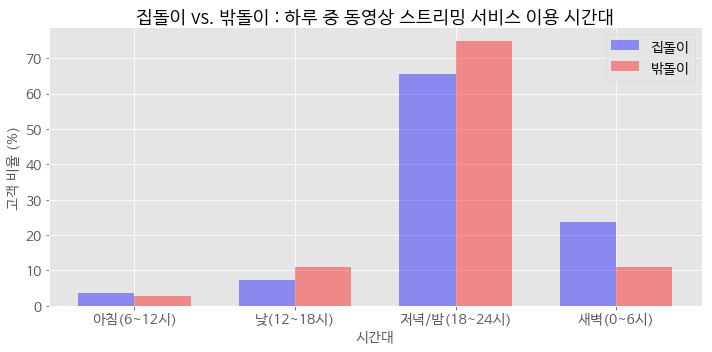

In [37]:
n_groups = 4

fig, ax = plt.subplots(figsize=(10,5))

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, count_zip22[1:]/sum(count_zip22[1:])*100, bar_width, 
                alpha=opacity, color='b', 
                error_kw=error_config, 
                label='집돌이')

rects2 = ax.bar(index + bar_width, count_nozip22[1:]/sum(count_nozip22[1:])*100, bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='밖돌이')

ax.set_xlabel('시간대', fontsize=14)
ax.set_ylabel('고객 비율 (%)', fontsize=14)
ax.set_title('집돌이 vs. 밖돌이 : 하루 중 동영상 스트리밍 서비스 이용 시간대', fontsize=18)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['아침(6~12시)', '낮(12~18시)', '저녁/밤(18~24시)', '새벽(0~6시)'], fontsize=14)
ax.set_yticks(range(0,80,10))
ax.set_yticklabels(range(0,80,10), fontsize=14)
ax.legend(fontsize=14)

 
fig.tight_layout()
plt.show()

## 집돌이들은 왜 인터넷 동영상 스트리밍 서비스를 이용할까? 

### (설문 Q23) 인터넷 동영상 스트리밍 서비스를 이용하는 이유는 무엇입니까?

* 집돌이

In [26]:
num, count_zip23 = np.unique(zipdol['Q23'], return_counts=True)

In [27]:
num, count_zip23

(array(['1', '2', '3', '4', '5(영화 및 미드감상)'], dtype=object),
 array([40,  2, 44,  8,  1], dtype=int64))

In [28]:
zipdol[zipdol['Q23']=='5(영화 및 미드감상)']

,CLNN,SEX_CCD,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25_1,Q25_2,Q25_3,Q25_4,Q25_5,Q26,Q27,Q17,zipdol
368,Z9663225601ST,F,2,6,5,2,2,5(영화 및 미드감상),1,NaN,NaN,3.0,NaN,NaN,1,1,8,2


In [29]:
zipdol['Q23'][zipdol['Q23']=='5(영화 및 미드감상)'] = '3'

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [30]:
num, count_zip23 = np.unique(zipdol['Q23'], return_counts=True)

In [31]:
num, count_zip23

(array(['1', '2', '3', '4'], dtype=object),
 array([40,  2, 45,  8], dtype=int64))

* 밖돌이

In [32]:
num, count_nozip23 = np.unique(nozipdol['Q23'], return_counts=True)

In [33]:
num, count_nozip23

(array(['1', '2', '3', '4'], dtype=object),
 array([35,  4, 25,  7], dtype=int64))

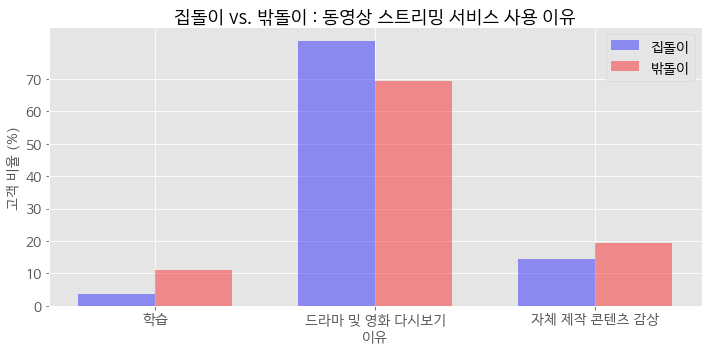

In [34]:
n_groups = 3

fig, ax = plt.subplots(figsize=(10,5))

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, count_zip23[1:]/sum(count_zip23[1:])*100, bar_width, 
                alpha=opacity, color='b', 
                error_kw=error_config, 
                label='집돌이')

rects2 = ax.bar(index + bar_width, count_nozip23[1:]/sum(count_nozip23[1:])*100, bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='밖돌이')

ax.set_xlabel('이유', fontsize=14)
ax.set_ylabel('고객 비율 (%)', fontsize=14)
ax.set_title('집돌이 vs. 밖돌이 : 동영상 스트리밍 서비스 사용 이유', fontsize=18)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['학습', '드라마 및 영화 다시보기', '자체 제작 콘텐츠 감상'], fontsize=14)
ax.set_yticks(range(0,80,10))
ax.set_yticklabels(range(0,80,10), fontsize=14)
ax.legend(fontsize=14)

 
fig.tight_layout()
plt.show()

## 동영상 스트리밍 서비스를 더 자주, 더 오랜 시간 이용하는 고객은 집돌이일까?

* 연간 이용횟수 10회 이상이고 하루 이용시간 3시간 이상인 고객

In [61]:
video_king = video['zipdol'][(video['Q20'] == 5) & (video['Q21'] == 5)]

In [62]:
len(video_king)

21

* counts

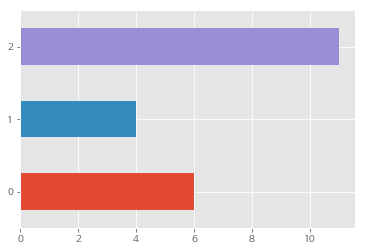

In [63]:
video_king.value_counts().sort_index().plot.barh()

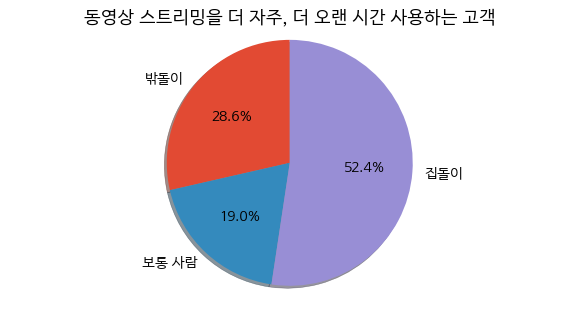

In [65]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['밖돌이', '보통 사람', '집돌이']
sizes = video_king.value_counts().sort_index()

#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('동영상 스트리밍을 더 자주, 더 오랜 시간 사용하는 고객', fontsize=18)

plt.show()

* ratio

In [53]:
video_king_counts = video_king.value_counts().sort_index()

In [54]:
video_king_counts

0     6
1     4
2    11
Name: zipdol, dtype: int64

In [55]:
video_counts = video['zipdol'].value_counts().sort_index()

In [56]:
video_counts

0     71
1    102
2    145
Name: zipdol, dtype: int64

In [57]:
video_king_ratio = video_king_counts/video_counts * 100

In [58]:
video_king_ratio

0    8.450704
1    3.921569
2    7.586207
Name: zipdol, dtype: float64

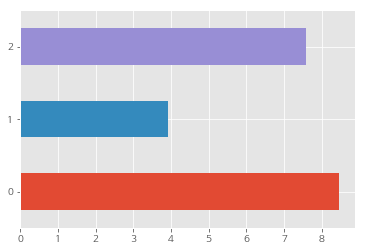

In [59]:
video_king_ratio.plot.barh()

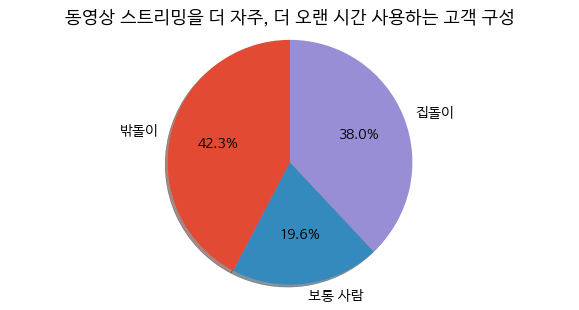

In [60]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['밖돌이', '보통 사람', '집돌이']
sizes = video_king_ratio

#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('동영상 스트리밍을 더 자주, 더 오랜 시간 사용하는 고객 구성', fontsize=18)

plt.show()

* 집돌이 레벨 1~10까지의 구성

In [51]:
video_king = video['Q17'][(video['Q20'] == 5) & (video['Q21'] == 5)]

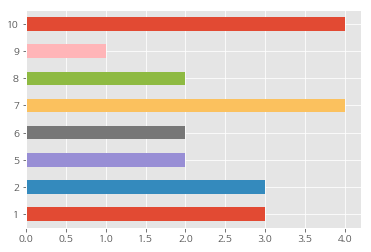

In [52]:
video_king.value_counts().sort_index().plot.barh()

In [53]:
video_king = video['Q17'][(video['Q20'] >= 4) & (video['Q21'] >= 4)]

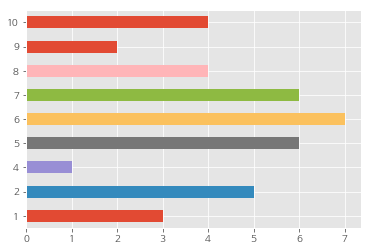

In [54]:
video_king.value_counts().sort_index().plot.barh()

## 동영상 스트리밍 서비스를 거의 사용하지  않는 고객은 밖돌이일까?

In [73]:
video_less = video['zipdol'][(video['Q20'] == 1) |(video['Q20'] == 2)]

In [74]:
len(video_less)

192

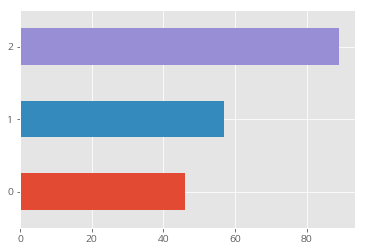

In [75]:
video_less.value_counts().sort_index().plot.barh()

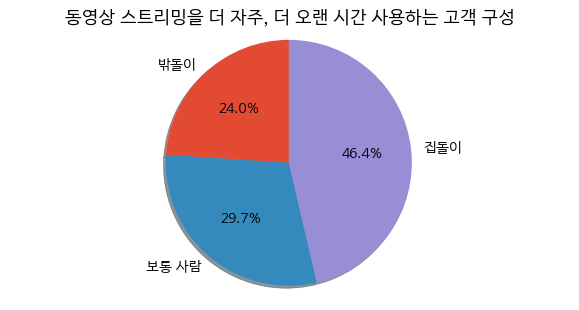

In [83]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['밖돌이', '보통 사람', '집돌이']
sizes = video_less.value_counts().sort_index()

#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('동영상 스트리밍을 더 자주, 더 오랜 시간 사용하는 고객 구성', fontsize=18)

plt.show()

In [84]:
video_less = video['zipdol'][video['Q20'] == 1]

In [85]:
len(video_less)

148

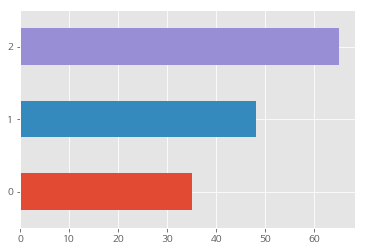

In [86]:
video_less.value_counts().sort_index().plot.barh()

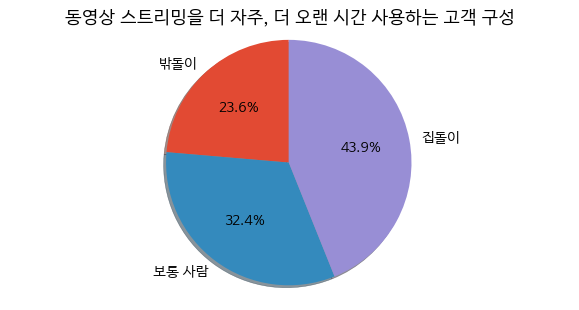

In [87]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['밖돌이', '보통 사람', '집돌이']
sizes = video_less.value_counts().sort_index()

#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('동영상 스트리밍을 더 자주, 더 오랜 시간 사용하는 고객 구성', fontsize=18)

plt.show()